### Plot timeseries of AW core

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [3]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [4]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Extract boxes we want

In [20]:
# isolate AW box in each row
theta_row000_AW = theta_row000.sel(depth=slice(275,400)).isel(cols=slice(185,210))
theta_row025_AW = theta_row025.sel(depth=slice(275,400)).isel(cols=slice(160,180))
theta_row050_AW = theta_row050.sel(depth=slice(290,360)).isel(cols=slice(145,160))
theta_row075_AW = theta_row075.sel(depth=slice(295,370)).isel(cols=slice(145,170))
theta_row100_AW = theta_row100.sel(depth=slice(300,370)).isel(cols=slice(145,155))
theta_row125_AW = theta_row125.sel(depth=slice(290,380)).isel(cols=slice(125,145))
theta_row150_AW = theta_row150.sel(depth=slice(320,380)).isel(cols=slice(130,145))

salt_row000_AW = salt_row000.sel(depth=slice(275,400)).isel(cols=slice(185,210))
salt_row025_AW = salt_row025.sel(depth=slice(275,400)).isel(cols=slice(160,180))
salt_row050_AW = salt_row050.sel(depth=slice(290,360)).isel(cols=slice(145,160))
salt_row075_AW = salt_row075.sel(depth=slice(295,370)).isel(cols=slice(145,170))
salt_row100_AW = salt_row100.sel(depth=slice(300,370)).isel(cols=slice(145,155))
salt_row125_AW = salt_row125.sel(depth=slice(290,380)).isel(cols=slice(125,145))
salt_row150_AW = salt_row150.sel(depth=slice(320,380)).isel(cols=slice(130,145))

Mask land cells

In [21]:
## mask land cells
theta_row000_AW = theta_row000_AW.where(salt_row000_AW.SALT>0)
theta_row025_AW = theta_row025_AW.where(salt_row025_AW.SALT>0)
theta_row050_AW = theta_row050_AW.where(salt_row050_AW.SALT>0)
theta_row075_AW = theta_row075_AW.where(salt_row075_AW.SALT>0)
theta_row100_AW = theta_row100_AW.where(salt_row100_AW.SALT>0)
theta_row125_AW = theta_row125_AW.where(salt_row125_AW.SALT>0)
theta_row150_AW = theta_row150_AW.where(salt_row150_AW.SALT>0)

salt_row000_AW = salt_row000_AW.where(salt_row000_AW.SALT>0)
salt_row025_AW = salt_row025_AW.where(salt_row025_AW.SALT>0)
salt_row050_AW = salt_row050_AW.where(salt_row050_AW.SALT>0)
salt_row075_AW = salt_row075_AW.where(salt_row075_AW.SALT>0)
salt_row100_AW = salt_row100_AW.where(salt_row100_AW.SALT>0)
salt_row125_AW = salt_row125_AW.where(salt_row125_AW.SALT>0)
salt_row150_AW = salt_row150_AW.where(salt_row150_AW.SALT>0)

Average over boxes (once we have geometries, I will weight grid cells by volume)

In [22]:
# take mean of boxes
theta_row000_AW_mean = theta_row000_AW.mean(['cols','depth'],skipna=True).THETA
theta_row025_AW_mean = theta_row025_AW.mean(['cols','depth'],skipna=True).THETA
theta_row050_AW_mean = theta_row050_AW.mean(['cols','depth'],skipna=True).THETA
theta_row075_AW_mean = theta_row075_AW.mean(['cols','depth'],skipna=True).THETA
theta_row100_AW_mean = theta_row100_AW.mean(['cols','depth'],skipna=True).THETA
theta_row125_AW_mean = theta_row125_AW.mean(['cols','depth'],skipna=True).THETA
theta_row150_AW_mean = theta_row150_AW.mean(['cols','depth'],skipna=True).THETA

salt_row000_AW_mean = salt_row000_AW.mean(['cols','depth'],skipna=True).SALT
salt_row025_AW_mean = salt_row025_AW.mean(['cols','depth'],skipna=True).SALT
salt_row050_AW_mean = salt_row050_AW.mean(['cols','depth'],skipna=True).SALT
salt_row075_AW_mean = salt_row075_AW.mean(['cols','depth'],skipna=True).SALT
salt_row100_AW_mean = salt_row100_AW.mean(['cols','depth'],skipna=True).SALT
salt_row125_AW_mean = salt_row125_AW.mean(['cols','depth'],skipna=True).SALT
salt_row150_AW_mean = salt_row150_AW.mean(['cols','depth'],skipna=True).SALT

In [10]:
np.diff(salt_row100_AW.depth.values)

array([27.100006], dtype=float32)

### Plot daily time series

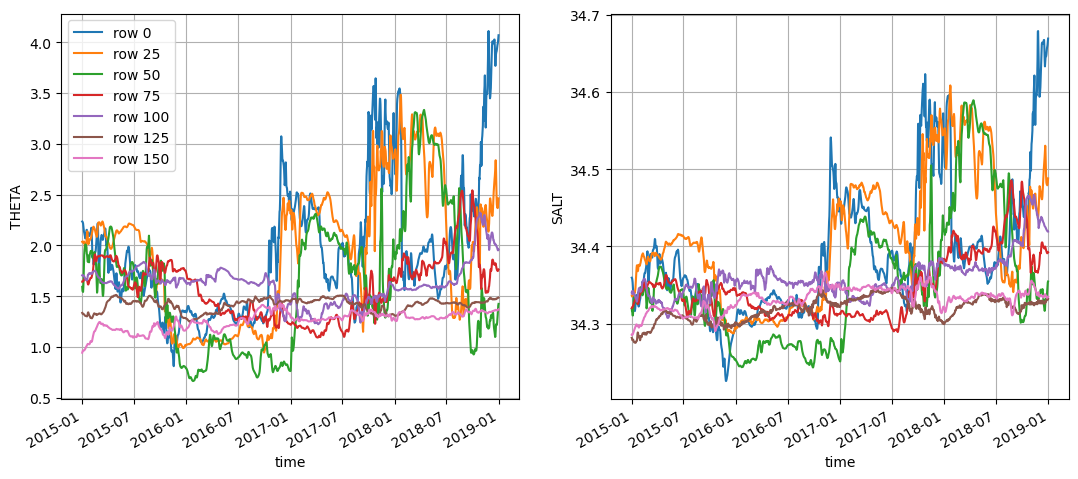

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_AW_mean.plot(ax=ax1,label='row 0')
theta_row025_AW_mean.plot(ax=ax1,label='row 25')
theta_row050_AW_mean.plot(ax=ax1,label='row 50')
theta_row075_AW_mean.plot(ax=ax1,label='row 75')
theta_row100_AW_mean.plot(ax=ax1,label='row 100')
theta_row125_AW_mean.plot(ax=ax1,label='row 125')
theta_row150_AW_mean.plot(ax=ax1,label='row 150')
ax1.legend()
ax1.grid()

salt_row000_AW_mean.plot(ax=ax2,label='row 0')
salt_row025_AW_mean.plot(ax=ax2,label='row 25')
salt_row050_AW_mean.plot(ax=ax2,label='row 50')
salt_row075_AW_mean.plot(ax=ax2,label='row 75')
salt_row100_AW_mean.plot(ax=ax2,label='row 100')
salt_row125_AW_mean.plot(ax=ax2,label='row 125')
salt_row150_AW_mean.plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

### Plot monthly time series

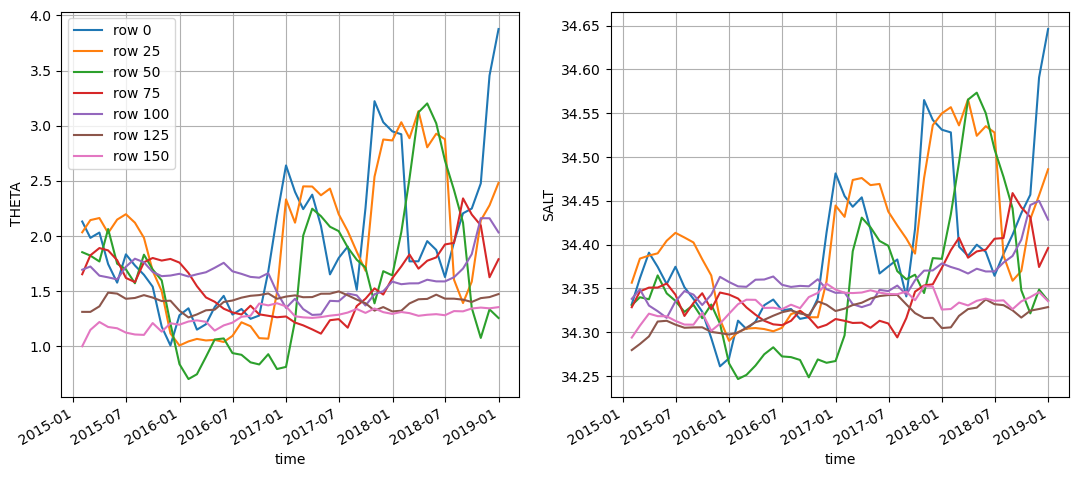

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 0')
theta_row025_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 25')
theta_row050_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 50')
theta_row075_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 75')
theta_row100_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 100')
theta_row125_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 125')
theta_row150_AW_mean.resample(time='1M').mean('time').plot(ax=ax1,label='row 150')
ax1.legend()
ax1.grid()

salt_row000_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 0')
salt_row025_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 25')
salt_row050_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 50')
salt_row075_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 75')
salt_row100_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 100')
salt_row125_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 125')
salt_row150_AW_mean.resample(time='1M').mean('time').plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

### Group by month and plot

In [25]:
## order months
theta_row000_AW_month = theta_row000_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row025_AW_month = theta_row025_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row050_AW_month = theta_row050_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row075_AW_month = theta_row075_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row100_AW_month = theta_row100_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row125_AW_month = theta_row125_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
theta_row150_AW_month = theta_row150_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

theta_row000_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row025_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row050_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row075_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row100_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row125_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
theta_row150_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

salt_row000_AW_month = salt_row000_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row025_AW_month = salt_row025_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row050_AW_month = salt_row050_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row075_AW_month = salt_row075_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row100_AW_month = salt_row100_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row125_AW_month = salt_row125_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])
salt_row150_AW_month = salt_row150_AW_mean.groupby('time.month').mean('time').sel(month=[5,6,7,8,9,10,11,12,1,2,3,4])

salt_row000_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row025_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row050_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row075_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row100_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row125_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
salt_row150_AW_month['month'] = ['May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']

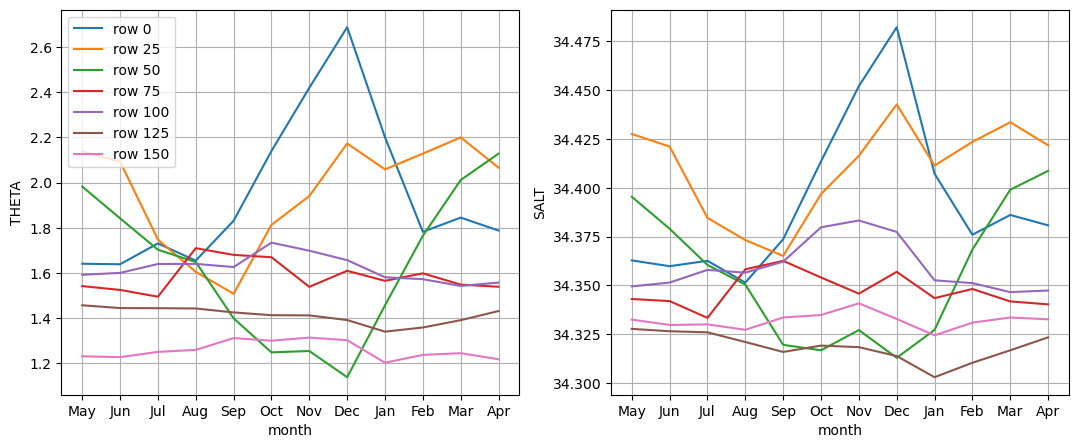

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

theta_row000_AW_month.plot(ax=ax1,label='row 0')
theta_row025_AW_month.plot(ax=ax1,label='row 25')
theta_row050_AW_month.plot(ax=ax1,label='row 50')
theta_row075_AW_month.plot(ax=ax1,label='row 75')
theta_row100_AW_month.plot(ax=ax1,label='row 100')
theta_row125_AW_month.plot(ax=ax1,label='row 125')
theta_row150_AW_month.plot(ax=ax1,label='row 150')
ax1.legend(loc='upper left')
ax1.grid()

salt_row000_AW_month.plot(ax=ax2,label='row 0')
salt_row025_AW_month.plot(ax=ax2,label='row 25')
salt_row050_AW_month.plot(ax=ax2,label='row 50')
salt_row075_AW_month.plot(ax=ax2,label='row 75')
salt_row100_AW_month.plot(ax=ax2,label='row 100')
salt_row125_AW_month.plot(ax=ax2,label='row 125')
salt_row150_AW_month.plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

Plot anomalies

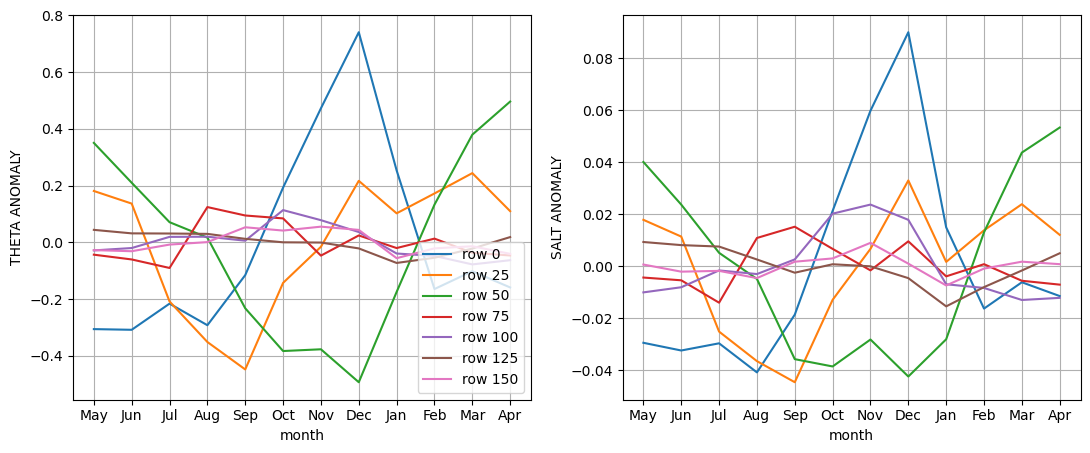

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

(theta_row000_AW_month-theta_row000_AW_month.mean()).plot(ax=ax1,label='row 0')
(theta_row025_AW_month-theta_row025_AW_month.mean()).plot(ax=ax1,label='row 25')
(theta_row050_AW_month-theta_row050_AW_month.mean()).plot(ax=ax1,label='row 50')
(theta_row075_AW_month-theta_row075_AW_month.mean()).plot(ax=ax1,label='row 75')
(theta_row100_AW_month-theta_row100_AW_month.mean()).plot(ax=ax1,label='row 100')
(theta_row125_AW_month-theta_row125_AW_month.mean()).plot(ax=ax1,label='row 125')
(theta_row150_AW_month-theta_row150_AW_month.mean()).plot(ax=ax1,label='row 150')
ax1.legend(loc='lower right')
ax1.grid()

(salt_row000_AW_month-salt_row000_AW_month.mean()).plot(ax=ax2,label='row 0')
(salt_row025_AW_month-salt_row025_AW_month.mean()).plot(ax=ax2,label='row 25')
(salt_row050_AW_month-salt_row050_AW_month.mean()).plot(ax=ax2,label='row 50')
(salt_row075_AW_month-salt_row075_AW_month.mean()).plot(ax=ax2,label='row 75')
(salt_row100_AW_month-salt_row100_AW_month.mean()).plot(ax=ax2,label='row 100')
(salt_row125_AW_month-salt_row125_AW_month.mean()).plot(ax=ax2,label='row 125')
(salt_row150_AW_month-salt_row150_AW_month.mean()).plot(ax=ax2,label='row 150')
# ax2.legend()
ax2.grid()

ax1.set_ylabel("THETA ANOMALY")
ax2.set_ylabel("SALT ANOMALY");

### Group by season and plot

Calculate seasonal climatologies

In [28]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [29]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000_AW_mean)
theta_row025_season = seasonal_mean(theta_row025_AW_mean)
theta_row050_season = seasonal_mean(theta_row050_AW_mean)
theta_row075_season = seasonal_mean(theta_row075_AW_mean)
theta_row100_season = seasonal_mean(theta_row100_AW_mean)
theta_row125_season = seasonal_mean(theta_row125_AW_mean)
theta_row150_season = seasonal_mean(theta_row150_AW_mean)

## salinity
salt_row000_season = seasonal_mean(salt_row000_AW_mean)
salt_row025_season = seasonal_mean(salt_row025_AW_mean)
salt_row050_season = seasonal_mean(salt_row050_AW_mean)
salt_row075_season = seasonal_mean(salt_row075_AW_mean)
salt_row100_season = seasonal_mean(salt_row100_AW_mean)
salt_row125_season = seasonal_mean(salt_row125_AW_mean)
salt_row150_season = seasonal_mean(salt_row150_AW_mean)

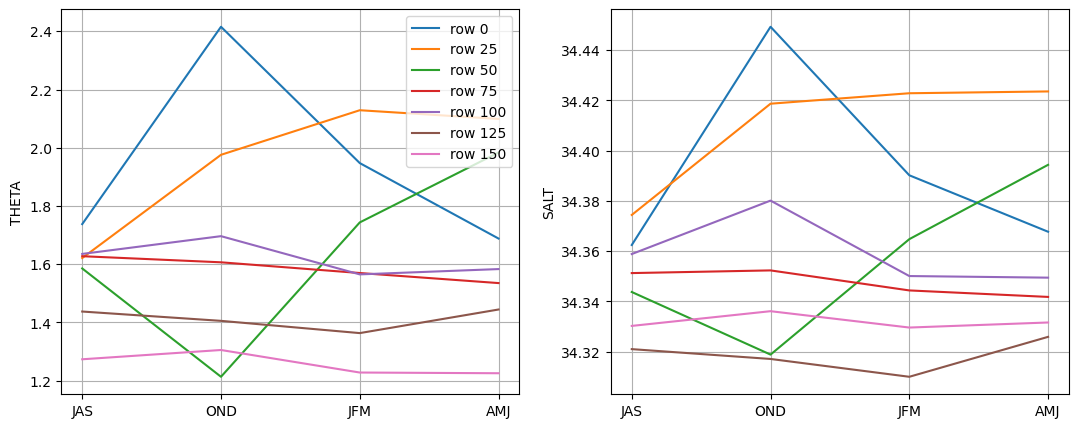

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

ax1.plot([1,2,3,4],theta_row000_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax1.plot([1,2,3,4],theta_row025_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax1.plot([1,2,3,4],theta_row050_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax1.plot([1,2,3,4],theta_row075_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax1.plot([1,2,3,4],theta_row100_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax1.plot([1,2,3,4],theta_row125_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax1.plot([1,2,3,4],theta_row150_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
ax1.legend(loc='upper right')
ax1.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax1.grid();

ax2.plot([1,2,3,4],salt_row000_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax2.plot([1,2,3,4],salt_row025_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax2.plot([1,2,3,4],salt_row050_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax2.plot([1,2,3,4],salt_row075_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax2.plot([1,2,3,4],salt_row100_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax2.plot([1,2,3,4],salt_row125_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax2.plot([1,2,3,4],salt_row150_season.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
# ax2.legend(loc='lower right')
ax2.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax2.grid();

ax1.set_ylabel("THETA")
ax2.set_ylabel("SALT");

Plot anomalies

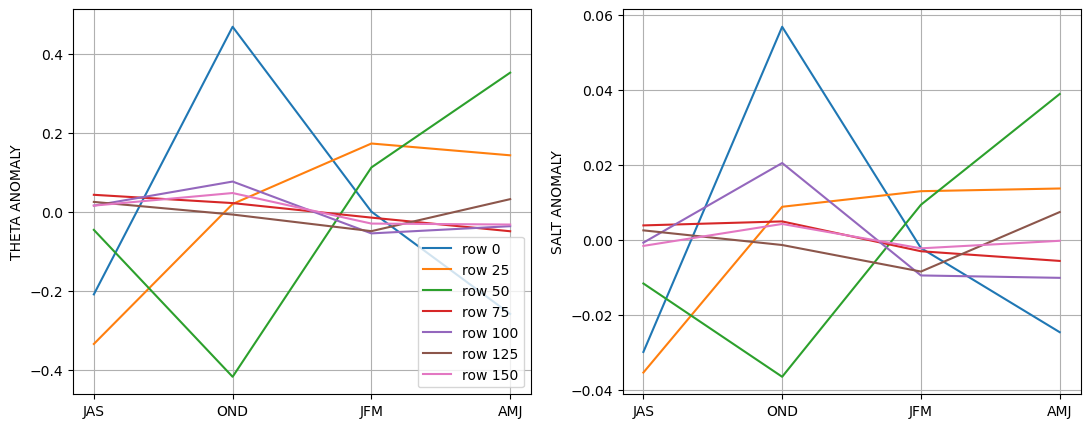

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[13,5])

ax1.plot([1,2,3,4],(theta_row000_season-theta_row000_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax1.plot([1,2,3,4],(theta_row025_season-theta_row025_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax1.plot([1,2,3,4],(theta_row050_season-theta_row050_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax1.plot([1,2,3,4],(theta_row075_season-theta_row075_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax1.plot([1,2,3,4],(theta_row100_season-theta_row100_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax1.plot([1,2,3,4],(theta_row125_season-theta_row125_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax1.plot([1,2,3,4],(theta_row150_season-theta_row150_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
ax1.legend(loc='lower right')
ax1.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax1.grid();

ax2.plot([1,2,3,4],(salt_row000_season-salt_row000_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
ax2.plot([1,2,3,4],(salt_row025_season-salt_row025_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
ax2.plot([1,2,3,4],(salt_row050_season-salt_row050_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
ax2.plot([1,2,3,4],(salt_row075_season-salt_row075_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
ax2.plot([1,2,3,4],(salt_row100_season-salt_row100_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
ax2.plot([1,2,3,4],(salt_row125_season-salt_row125_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
ax2.plot([1,2,3,4],(salt_row150_season-salt_row150_season.mean()).sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
# ax2.legend(loc='lower right')
ax2.set_xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
ax2.grid();

ax1.set_ylabel("THETA ANOMALY")
ax2.set_ylabel("SALT ANOMALY");